In [34]:
import requests
import pandas as pd
import numpy as np
from datetime import datetime as dt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

## 1. OSC con Clave Única de Inscripción

In [95]:
CLUNI = ''
NOMBRE = ''
ACRONIMO = ''
RFC = ''
STATUS_OSC = ''
STATUS_SANCION = ''
FIGURA_JURIDICA = ''
ESTADO = ''
MUNICIPIO = ''
ASENTAMIENTO = ''
CP = ''
REP_NOMBRE = ''
REP_APATERNO = ''
REP_AMATERNO = ''
NUM_NOTARIA = ''
OBJETO_SOCIAL = ''
RED = ''
ADVANCED = ''

In [96]:
CLUNI_URL = f"http://www.sii.gob.mx/portal/organizaciones/excel/?cluni={CLUNI}&nombre={NOMBRE}&acronimo={ACRONIMO}&rfc={RFC}&status_osc={STATUS_OSC}&status_sancion={STATUS_SANCION}&figura_juridica={FIGURA_JURIDICA}&estado={ESTADO}&municipio={MUNICIPIO}&asentamiento={ASENTAMIENTO}&cp={CP}&rep_nombre={REP_NOMBRE}&rep_apaterno={REP_APATERNO}&rep_amaterno={REP_AMATERNO}&num_notaria={NUM_NOTARIA}&objeto_social={OBJETO_SOCIAL}&red={RED}&advanced=1"

In [97]:
payload={}
headers = {
  'Upgrade-Insecure-Requests': '1',
  'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 11_2_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.96 Safari/537.36',
  'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9'
}

In [98]:
cluni_response = requests.request("GET", CLUNI_URL, headers=headers, data=payload)

In [99]:
CLUNI_NOW = str(dt.now())[:19].replace(' ', '-').replace(':', '-')

In [100]:
with open(f"/content/drive/MyDrive/NewCo/intel/data/SIRFOSC/report-rfosc-{CLUNI_NOW}.txt", "w+") as f:
  f.write(cluni_response.text)

In [101]:
df_osc_cluni = pd.DataFrame([row.split('","') for row in cluni_response.text.split('\n')])
df_osc_cluni[0] = df_osc_cluni[0].str.replace('"', '')
df_osc_cluni[df_osc_cluni.shape[1]-1] = df_osc_cluni[df_osc_cluni.shape[1]-1].str.replace('"\r', '')
df_osc_cluni = df_osc_cluni.rename(columns=df_osc_cluni.iloc[0]).iloc[1:]
df_osc_cluni = df_osc_cluni[:-1]

In [102]:
df_osc_cluni.head()

,CLUNI,RAZON SOCIAL,FIGURA JURIDICA,RFC,ESTATUS,ESTATUS DE SANCION,REPRESENTANTES LEGALES,ESTATUS DE LA REPRESENTACION,FECHA DE CONSTITUCION,FECHA DE INSCRIPCION,CORREO(S),TELEFONO(S),ENTIDAD FEDERATIVA DOMICILIO,MUNICIPIO,ASENTAMIENTO(COLONIA),VIALIDAD (CALLE),NUMERO EXTERIOR,NUMERO INTERIOR,CP,REDES,ACTIVIDAD_1,ACTIVIDAD_2,ACTIVIDAD_3,ACTIVIDAD_4,ACTIVIDAD_5,ACTIVIDAD_6,ACTIVIDAD_7,ACTIVIDAD_8,ACTIVIDAD_9,ACTIVIDAD_10,ACTIVIDAD_11,ACTIVIDAD_12,ACTIVIDAD_13,ACTIVIDAD_14,ACTIVIDAD_15,ACTIVIDAD_16,ACTIVIDAD_17,ACTIVIDAD_18,ACTIVIDAD_19,INFORME 2005 PRESENTADO,INFORME 2005 EN TIEMPO,INFORME 2006 PRESENTADO,INFORME 2006 EN TIEMPO,INFORME 2007 PRESENTADO,INFORME 2007 EN TIEMPO,INFORME 2008 PRESENTADO,INFORME 2008 EN TIEMPO,INFORME 2009 PRESENTADO,INFORME 2009 EN TIEMPO,INFORME 2010 PRESENTADO,INFORME 2010 EN TIEMPO,INFORME 2011 PRESENTADO,INFORME 2011 EN TIEMPO,INFORME 2012 PRESENTADO,INFORME 2012 EN TIEMPO,INFORME 2013 PRESENTADO,INFORME 2013 EN TIEMPO,INFORME 2014 PRESENTADO,INFORME 2014 EN TIEMPO,INFORME 2015 PRESENTADO,INFORME 2015 EN TIEMPO,INFORME 2016 PRESENTADO,INFORME 2016 EN TIEMPO,INFORME 2017 PRESENTADO,INFORME 2017 EN TIEMPO,INFORME 2018 PRESENTADO,INFORME 2018 EN TIEMPO,INFORME 2019 PRESENTADO,INFORME 2019 EN TIEMPO
1,VCO98091405018,Voluntades por Coahuila,Asociación Civil,VCO980914457,ACTIVA,N/A,Rodrigo Montelongo Suárez,VENCIDA,1998-09-14,2005-05-18,grafitos@hotmail.com,(844) 4105590,Coahuila,Saltillo,Jacarandas Jardín,Jacarandas,124,,25203,Consejo de Organismos No Gubernamentales de Co...,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,SI,SI,SI,NO,SI,NO,SI,NO,SI,NO,SI,SI,SI,SI,SI,SI,NO,NA,NO,NA,NO,NA,NO,NA,NO,NA,NO,NA,NO,NA
2,UEF0303170101D,Unión Estatal Femenil FEPRA,Asociación Civil,UEF0303179P9,ACTIVA,N/A,Adriana Díaz de León Valdivia,VIGENTE,2003-03-17,2005-02-22,ufepra2004@yahoo.com.mx,"(449) 9965235,(449) 9965235",Aguascalientes,Aguascalientes,San Ignacio,Granja El Gavilán,S/N,,20326,,NO,NO,SI,NO,NO,SI,NO,SI,NO,NO,NO,SI,SI,SI,NO,NO,NO,NO,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,NO,NA,NO,NA,NO,NA,NO,NA,NO,NA
3,FOJ04100219013,Federación de Organizaciones Juveniles,Asociación Civil,FOJ041002PB3,INACTIVA,N/A,Jorge Alberto Arrambide Montemayor,VIGENTE,2004-10-02,2005-03-09,jorgearrambide@foj-nl.org.mx,"(81) 83434270,(81) 83434270,(81) 83434091",Nuevo León,Monterrey,El Mirador,Madrid,211,,64990,,NO,NO,SI,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,NO,SI,NO,NO,NO,NO,NA,NO,NA,NO,NA,NO,NA,NO,NA,NO,NA,NO,NA,NO,NA,NO,NA,NO,NA,NO,NA,NO,NA,NO,NA,NO,NA,NO,NA
4,ARP95040609019,Aguilas Reales Pro Dignidad del Discapacitado,Asociación Civil,ARP950406IF8,ACTIVA,N/A,"David Peral Manzo,David Peral Manzo",VENCIDA,1995-04-06,2005-04-21,aguilasrealesac8@hotmail.com,(55) 26048545,Distrito Federal,Benito Juárez,Santa Cruz Atoyac,Emiliano Zapata,363,,03310,,NO,NO,SI,NO,NO,SI,SI,NO,SI,SI,NO,NO,SI,NO,NO,NO,NO,NO,NO,NO,NA,NO,NA,NO,NA,NO,NA,NO,NA,NO,NA,NO,NA,NO,NA,NO,NA,NO,NA,NO,NA,NO,NA,NO,NA,NO,NA,NO,NA
5,FIM97120122015,Formación Integral de la Mujer,Institución de Asistencia Privada,FIM971201896,INACTIVA,N/A,"María Teresa Duarte Belloc,María Teresa Rodríg...",VIGENTE,1997-09-18,2005-04-08,fimiap@hotmail.com,"(442) 2121756,(442) 2121756",Querétaro,Corregidora,Camino Real,Guerrero,10 Norte,,76086,,NO,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,NO,NA


In [103]:
df_osc_cluni.shape

(42725, 69)

In [104]:
df_osc_cluni.to_csv(f"/content/drive/MyDrive/NewCo/intel/data/SIRFOSC/report-rfosc-{CLUNI_NOW}.csv")

In [105]:
df_osc_cluni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42725 entries, 1 to 42725
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   CLUNI                         42725 non-null  object
 1   RAZON SOCIAL                  42725 non-null  object
 2   FIGURA JURIDICA               42725 non-null  object
 3   RFC                           42725 non-null  object
 4   ESTATUS                       42725 non-null  object
 5   ESTATUS DE SANCION            42725 non-null  object
 6   REPRESENTANTES LEGALES        42725 non-null  object
 7   ESTATUS DE LA REPRESENTACION  42725 non-null  object
 8   FECHA DE CONSTITUCION         42725 non-null  object
 9   FECHA DE INSCRIPCION          42725 non-null  object
 10  CORREO(S)                     42725 non-null  object
 11  TELEFONO(S)                   42724 non-null  object
 12  ENTIDAD FEDERATIVA DOMICILIO  42724 non-null  object
 13  MUNICIPIO       

In [106]:
df_osc_cluni.ESTATUS.value_counts()

INACTIVA          29307
ACTIVA            13417
Cruz del Farol        1
Name: ESTATUS, dtype: int64

In [107]:
(df_osc_cluni[df_osc_cluni.ESTATUS == 'ACTIVA']['FECHA DE CONSTITUCION'].str[0:4].value_counts() / len(df_osc_cluni[df_osc_cluni.ESTATUS == 'ACTIVA'])).sort_index(ascending=False).head(21)

2020    0.002460
2019    0.020795
2018    0.057837
2017    0.074383
2016    0.079079
2015    0.072744
2014    0.068719
2013    0.076545
2012    0.068048
2011    0.061191
2010    0.053142
2009    0.044719
2008    0.040546
2007    0.030186
2006    0.026086
2005    0.026534
2004    0.019602
2003    0.016770
2002    0.013788
2001    0.013639
2000    0.011851
Name: FECHA DE CONSTITUCION, dtype: float64

In [108]:
(df_osc_cluni[df_osc_cluni.ESTATUS == 'ACTIVA']['ENTIDAD FEDERATIVA DOMICILIO'].value_counts() / len(df_osc_cluni[df_osc_cluni.ESTATUS == 'ACTIVA'])) # .cumsum()

Distrito Federal       0.246627
Estado de México       0.096668
Oaxaca                 0.056645
Veracruz               0.055303
Chiapas                0.041440
Jalisco                0.040993
Puebla                 0.040098
Baja California        0.035552
Chihuahua              0.029515
Guanajuato             0.029515
Michoacán              0.027726
Sonora                 0.024819
Nuevo León             0.022807
Yucatán                0.021391
Durango                0.020869
Hidalgo                0.020198
Morelos                0.019155
Guerrero               0.017515
Querétaro              0.017142
Coahuila               0.016844
Sinaloa                0.016546
Tamaulipas             0.014161
Tabasco                0.012447
Quintana Roo           0.012298
San Luis Potosí        0.010882
Tlaxcala               0.010658
Zacatecas              0.008273
Aguascalientes         0.007602
Baja California Sur    0.007081
Nayarit                0.006932
Colima                 0.006782
Campeche

In [109]:
df_osc_cluni.sample(1)

,CLUNI,RAZON SOCIAL,FIGURA JURIDICA,RFC,ESTATUS,ESTATUS DE SANCION,REPRESENTANTES LEGALES,ESTATUS DE LA REPRESENTACION,FECHA DE CONSTITUCION,FECHA DE INSCRIPCION,CORREO(S),TELEFONO(S),ENTIDAD FEDERATIVA DOMICILIO,MUNICIPIO,ASENTAMIENTO(COLONIA),VIALIDAD (CALLE),NUMERO EXTERIOR,NUMERO INTERIOR,CP,REDES,ACTIVIDAD_1,ACTIVIDAD_2,ACTIVIDAD_3,ACTIVIDAD_4,ACTIVIDAD_5,ACTIVIDAD_6,ACTIVIDAD_7,ACTIVIDAD_8,ACTIVIDAD_9,ACTIVIDAD_10,ACTIVIDAD_11,ACTIVIDAD_12,ACTIVIDAD_13,ACTIVIDAD_14,ACTIVIDAD_15,ACTIVIDAD_16,ACTIVIDAD_17,ACTIVIDAD_18,ACTIVIDAD_19,INFORME 2005 PRESENTADO,INFORME 2005 EN TIEMPO,INFORME 2006 PRESENTADO,INFORME 2006 EN TIEMPO,INFORME 2007 PRESENTADO,INFORME 2007 EN TIEMPO,INFORME 2008 PRESENTADO,INFORME 2008 EN TIEMPO,INFORME 2009 PRESENTADO,INFORME 2009 EN TIEMPO,INFORME 2010 PRESENTADO,INFORME 2010 EN TIEMPO,INFORME 2011 PRESENTADO,INFORME 2011 EN TIEMPO,INFORME 2012 PRESENTADO,INFORME 2012 EN TIEMPO,INFORME 2013 PRESENTADO,INFORME 2013 EN TIEMPO,INFORME 2014 PRESENTADO,INFORME 2014 EN TIEMPO,INFORME 2015 PRESENTADO,INFORME 2015 EN TIEMPO,INFORME 2016 PRESENTADO,INFORME 2016 EN TIEMPO,INFORME 2017 PRESENTADO,INFORME 2017 EN TIEMPO,INFORME 2018 PRESENTADO,INFORME 2018 EN TIEMPO,INFORME 2019 PRESENTADO,INFORME 2019 EN TIEMPO
19408,AUT1106132001M,Alianza Unificadora de Transportistas y Comuni...,Asociación Civil,AUT110613EBA,INACTIVA,N/A,Sergio López Sánchez,VIGENTE,2011-06-13,2012-11-09,isralopez980@hotmail.com,(951) 5168274,Oaxaca,Oaxaca de Juárez,Oaxaca Centro,Calle Díaz Ordaz,102,6,68000,,NO,NO,NO,NO,SI,SI,SI,SI,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,SI,SI,SI,SI,NO,NA,NO,NA,NO,NA,NO,NA,NO,NA,NO,NA


## 2. OSC Registro Donatarias Autorizadas

In [110]:
# TODO: not download from source if data already exist

YEAR = '2020'
DONAUT_NOW = str(dt.now())[:19].replace(' ', '-').replace(':', '-')
SAT_URL = f'http://omawww.sat.gob.mx/documentossat/Documents/DirectorioDonatariasAutorizadas{YEAR}.xls'

response = requests.get(SAT_URL)

with open(f"/content/drive/MyDrive/NewCo/intel/data/DonatariasAutorizadas/report-sat-{YEAR}-{DONAUT_NOW}.xls", "wb") as f:
  f.write(response.content)

In [111]:
df_osc_sat = pd.read_excel(
    f"/content/drive/MyDrive/NewCo/intel/data/DonatariasAutorizadas/report-sat-{YEAR}-{DONAUT_NOW}.xls"
    , skiprows = range(0, 27)
    , usecols = "A:O"
    )

df_osc_sat = df_osc_sat.rename(columns=df_osc_sat.iloc[0]).iloc[1:]

In [112]:
df_osc_sat.head()

,ENTIDAD FEDERATIVA,ADMINISTRACIÓN DESCONCENTRADA DE SERVICIOS AL CONTRIBUYENTE,ACTIVIDAD O FIN AUTORIZADO,RFC,DENOMINACIÓN O RAZÓN SOCIAL,DOMICILIO FISCAL,OFICIO DE AUTORIZACIÓN,FECHA DE OFICIO,OBJETO SOCIAL AUTORIZADO,REPRESENTANTE LEGAL,NÚMEROS TELEFÓNICOS,E-MAIL,DOMICILIO DE ESTABLECIMIENTO,NÚMEROS TELEFÓNICOS DEL ESTABLECIMIENTO,ACREDITAMIENTO
1,AGUASCALIENTES,"AGUASCALIENTES ""1""",M,AAG150226BX0,"Autismo Aguascalientes, A.C.","Canada Núm 301, Col. El Dorado 1a Sección, C.P...",700-02-01-2019-08990,2019-09-26 00:00:00,"""CUARTA.- La Asociación Autismo Aguascalientes...",Olga Rubio Camarena,No Manifestó,No Manifestó,No Manifestó,No Manifestó,Constancia de Inscripción ante el Registro Fed...
2,AGUASCALIENTES,"AGUASCALIENTES ""1""",A,AAG150226BX0,"Autismo Aguascalientes, A.C.","Canada Núm 301, Col. El Dorado 1a Sección, C.P...",700-02-01-2019-08990,2019-09-26 00:00:00,"""CUARTA.- La Asociación Autismo Aguascalientes...",Olga Rubio Camarena,No Manifestó,No Manifestó,No Manifestó,No Manifestó,Constancia de Inscripción ante el Registro Fed...
3,AGUASCALIENTES,"AGUASCALIENTES ""1""",A,AAP010713QV5,"Asilo de Ancianos de Pabellón de Arteaga, Agua...","Independencia Núm 48, Col. Francisco Villa, C....",700-02-01-2020-05788,2020-05-22 00:00:00,"""ARTICULO SEGUNDO.- La Asociación tendrá por o...",Ma del Rosario Bueno Martínez,01465 958 10 90,No Manifestó,No Manifestó,No Manifestó,oficio DGSEA/0914/2019 de fecha 18 de diciembr...
4,AGUASCALIENTES,"AGUASCALIENTES ""1""",A,AAP7601261F0,Asociación Aguascalentense para la Promoción I...,"Olivos Núm 202, Col. Jardines de la Cruz, C.P....",600-04-05-2012-57253,2012-06-26 00:00:00,"""ARTICULO PRIMERO: OBJETO SOCIAL: La asociació...",Luis Manuel Macías López,(01449) 970-62-92,No Manifestó,No Manifestó,No Manifestó,oficio número DEIP-GF-80 de 24 de enero de 201...
5,AGUASCALIENTES,"AGUASCALIENTES ""1""",M,ACD130327SG7,Aliadas Carmelitas Descalzas de la Santísima T...,"Salvador Quezada Limón Núm 1105, Col. Curtidor...",600-04-02-2014-6778,2014-08-26 00:00:00,"""ARTÍCULO SEGUNDO.- El objeto de la asociación...",Laura Patricia Colmenares Ramírez,449168395,alidesamparados@hotmail.com,No Manifestó,No Manifestó,oficio número DGSEA-009/2014 de 7 de enero de ...


In [113]:
df_osc_sat.shape

(13931, 15)

## 3. CLUNI Activas y Donatarias Autorizazdas 

In [114]:
df_osc_actvig = df_osc_cluni[(df_osc_cluni['ESTATUS'] == 'ACTIVA') & (df_osc_cluni['ESTATUS DE LA REPRESENTACION'] == 'VIGENTE')][['CLUNI', 'RFC']]

In [115]:
df_osc_actvig.shape

(12563, 2)

In [116]:
df_osc = pd.merge(df_osc_actvig[['CLUNI', 'RFC']], df_osc_sat[['RFC']], how='outer')

In [117]:
df_osc = df_osc.drop_duplicates().reset_index(drop=True).copy()

In [118]:
len(df_osc)

17666

In [119]:
df_osc.isna().sum(axis=0)

CLUNI    5103
RFC         0
dtype: int64

In [120]:
df_osc.sample(5)

,CLUNI,RFC
9820,CAC161213108C8,CAC161213912
17526,NaN,AIP170830IN0
14266,NaN,ETM091126HR5
2636,ALD1001203001C,ALD1001201Y7
5410,AMP1303011801T,AMP130301B24


## 4. CLUNI Inactivas

In [121]:
df_osc_inactiva = df_osc_cluni[(df_osc_cluni['ESTATUS'] == 'INACTIVA')][['CLUNI', 'RFC']]

In [122]:
df_osc_inactiva.shape

(29307, 2)

In [123]:
pd.merge(df_osc_inactiva[['CLUNI', 'RFC']], df_osc_sat[['RFC']], how='outer').sample(5)

,CLUNI,RFC
41242,NaN,DEA821123B17
11488,CPC8606190901B,CPC860619PC1
22285,CUD14120514Q4E,CUD141205435
20566,IND1406250901S,IND1406259X5
21930,AEF05063010X2X,AEF050630LQ9


## 5. Donatarias Autorizadas (Resolución Miscelánea Fiscal)

In [12]:
!pip install ghostscript
!pip install "camelot-py[cv]"
!pip install excalibur-py
!apt install ghostscript python3-tk

from ctypes.util import find_library
print(find_library("gs")) #will display libgs.so.9 if installed; will print None if not
!excalibur initdb

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-tk is already the newest version (3.6.9-1~18.04).
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono gsfonts libcupsfilters1 libcupsimage2
  libgs9 libgs9-common libijs-0.35 libjbig2dec0 poppler-data
Suggested packages:
  fonts-noto ghostscript-x poppler-utils fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 poppler-data
0 upgraded, 11 newly installed, 0 to remove and 17 not upgraded.
Need to get 14.1 MB of archives.
After this operation, 49.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 fonts-droid-fallback all 1:6.0.

In [ ]:
# !camelot lattice -plot text /content/drive/MyDrive/NewCo/intel/data/a14-rms/test.pdf

2021-02-15T14:04:37 - INFO - Processing page-1
Found 0 tables


In [13]:
import camelot

In [16]:
# the following information should be specified

PAGES = '3' 
tables = camelot.read_pdf(
    '/content/drive/MyDrive/NewCo/intel/data/a14-rms/test2.pdf'
    , flavor='stream'
    , table_areas=['115,528,528,57'] # coordinates when we need to id table's head
    , pages = PAGES
    )

In [17]:
tables

<TableList n=1>

In [18]:
tables[0].parsing_report

{'accuracy': 100.0, 'order': 1, 'page': 3, 'whitespace': 7.89}

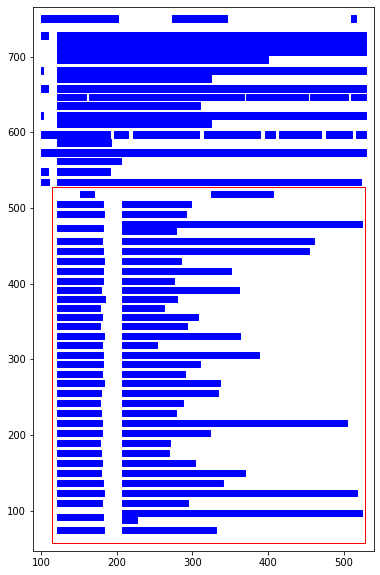

In [20]:
camelot.plot(tables[0], kind='contour').show()

In [21]:
tables[0].df

,0,1
0,RFC,Denominación Social
1,APO151201EH2,"""Ameyalco Posible"", A.C."
2,AAY110609KW0,"""ANEXA AYUDA"", A.C."
3,,"""Destino y Apoyo a las Comunidades por los Ni..."
4,DAC0505167G4,
5,,"de mi Pueblo"", A.C."
6,FSE110323T5A,"""FUNDACIÓN PARA LA SUPERACIÓN EDUCATIVA Y SOCI..."
7,ODE120423K39,"""ORDEN Y DESARROLLO EN CIUDAD NEZAHUALCOYOTL"",..."
8,SQU1005068UA,¿Sabías qué..? I.B.P.
9,MPS120222G22,"1,2,3 Por Mi y Parque Sacramento, A.C."


In [141]:
PAGES = '4-299'

In [142]:
tables = camelot.read_pdf(
    '/content/drive/MyDrive/NewCo/intel/data/a14-rms/test3.pdf'
    , flavor='stream'
    , table_areas=['115,738,528,57'] # coordinates when table is full page
    , pages = PAGES
    )

In [143]:
len(tables)

296

In [144]:
accuracies = []
whitespaces = []

for n in range(len(tables)):
  accuracies += [tables[n].parsing_report['accuracy']]
  whitespaces += [tables[n].parsing_report['accuracy']]

In [145]:
print('Average parsed accuracy', np.mean(accuracies).round(2))
print('Average parsed whitespace', np.mean(whitespaces).round(2))

Average parsed accuracy 99.91
Average parsed whitespace 99.91


In [149]:
df_donaut_rms = pd.DataFrame(columns=[0, 1])

for n in range(len(tables)):
  aux = tables[n].df
  
  if aux.shape[1] > 2: 
    # fixing some issues when osc name was not properly parsed
    aux[1] = aux[1] + aux[2]
    aux = aux[[0, 1]]
    
  df_donaut_rms = pd.concat([df_donaut_rms, aux])

df_donaut_rms = df_donaut_rms.rename(columns={0: 'RFC', 1: 'razon_social'})

# remove headers when osc changes their social objective in pdf
df_donaut_rms = df_donaut_rms[~((df_donaut_rms.RFC == 'RFC') & (df_donaut_rms.razon_social == 'Denominación Social'))].reset_index(drop=True)
df_donaut_rms = df_donaut_rms[df_donaut_rms.RFC.str.len().isin([0, 12]) ]

In [ ]:
# todo: create json with metadata to address table beggining and ending in pdf

In [ ]:
# todo: check for osc duplicates in dof :/
# todo: osc can have more than one cluni (active and inactive ids), BUT never more than 1 active cluni

In [150]:
df_donaut_rms.head()

,RFC,razon_social
0,ACR050616AJ2,"Acción Comunitaria Rita de Cascia, I.A.P."
1,AAL850903EQ4,"Acción contra el Alcoholismo, A.C."
2,ACP960911DP0,"Acción Cultural Politécnica, I.A.P."
3,AJA180312RY9,"Acción Juvenil Atla Atlatlahuca, A.C."
4,ASR120703B83,"Acción Social Ririki, A.C."


In [184]:
df_osc2 = pd.merge(df_osc_cluni[['CLUNI', 'RFC', 'ESTATUS']], df_donaut_rms, how='outer').drop_duplicates().reset_index(drop=True)

In [185]:
df_osc2.isna().sum(axis=0)

CLUNI            4322
RFC                 0
ESTATUS          4322
razon_social    36561
dtype: int64

In [186]:
df_osc2[df_osc2.razon_social.isna()].sample(5)

,CLUNI,RFC,ESTATUS,razon_social
21395,NSD0903282801X,NSD090328JK6,INACTIVA,NaN
24222,CEP0606021701J,CEP060602MF5,INACTIVA,NaN
36158,CAT16032309YPF,CAT160323HT0,ACTIVA,NaN
36437,POT16042030U0A,POT160420764,INACTIVA,NaN
19339,CCM03082211013,CCM030822K22,INACTIVA,NaN


In [187]:
df_osc2[df_osc2.CLUNI.isna()].sample(5)

,CLUNI,RFC,ESTATUS,razon_social
49838,NaN,CIO8004181K5,NaN,"Centro de Investigaciones en Óptica, A.C."
46879,NaN,CID110622RF6,NaN,"Centro Integral Down, A.C."
48601,NaN,CEE881021RQ7,NaN,"Centro Escolar El Encino, A.C."
50676,NaN,FRA200825SH1,NaN,FUNDACION REIMAGINANDO LA AYUDA Y LA ENSEÑANZA...
49687,NaN,SVS8609108J4,NaN,"Secundaria Vespertina Simón Bolivar, A.C.Educa..."


In [188]:
print(len(df_osc2.RFC))
print(len(df_osc2.RFC.drop_duplicates()))

50726
46097


In [189]:

df_osc2.RFC.value_counts()[df_osc2.RFC.value_counts() > 1]

                716
CDD110128IP9      4
DTV080303U27      4
CEA080620JH9      3
AMA460703AU4      3
               ... 
PUY121211AT1      2
FCA1111246Y8      2
ASC110726IP4      2
PBA1506161G3      2
AUI170126HN7      2
Name: RFC, Length: 3905, dtype: int64

In [190]:
df_osc2[df_osc2.RFC == 'CDD110128IP9']

,CLUNI,RFC,ESTATUS,razon_social
14353,CDD1101281001C,CDD110128IP9,INACTIVA,"Centro Destellos de Luz para Adultos Mayores, ..."
14354,CDD1101281001C,CDD110128IP9,INACTIVA,"Centro Destellos de Luz para Adultos Mayores, ..."
14355,CDD1101281002D,CDD110128IP9,ACTIVA,"Centro Destellos de Luz para Adultos Mayores, ..."
14356,CDD1101281002D,CDD110128IP9,ACTIVA,"Centro Destellos de Luz para Adultos Mayores, ..."
